(115.31221280524093, 117.61371772035137, 39.36093240805567, 41.142285386884375)

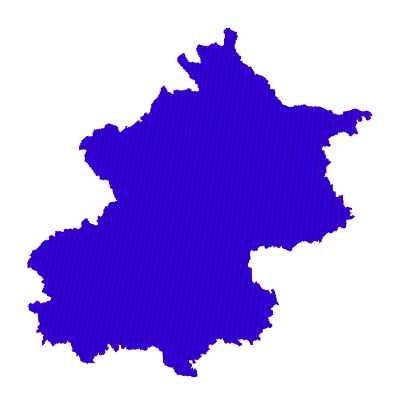

In [6]:
import geopandas as gpd
import h3pandas
import matplotlib.pyplot as plt

gdf = gpd.read_file('朝阳区.json', encoding='utf-8')
ax = gdf.plot(figsize=(5, 5), color='red')
gdf_h3 = gdf.h3.polyfill_resample(8)
gdf_h3.plot(ax=ax, color='blue', figsize=(5, 5))
ax.axis("off")


In [7]:
import pandas as pd

temp_111 = gdf.h3.polyfill(8)
# temp_111['h3_polyfill'].to_csv('temp_h4.csv', index=False)



In [8]:
temp1 = set()
for i in range(len(temp_111)):
  for j in temp_111['h3_polyfill'][i]:
    temp1.add(j)
file_name = "北京市.csv"
pd.DataFrame(temp1).to_csv(file_name, index=False)


In [9]:
import h3

temp_h6 = set()
for i in temp1:
    temp_h6.add(h3.h3_to_parent(i))
    
pd.DataFrame(temp_h6).to_csv('京津冀市级转为6级别结果.csv', index=False)


(115.31184148899621, 117.62151536149062, 39.35560399538481, 41.14528623707017)

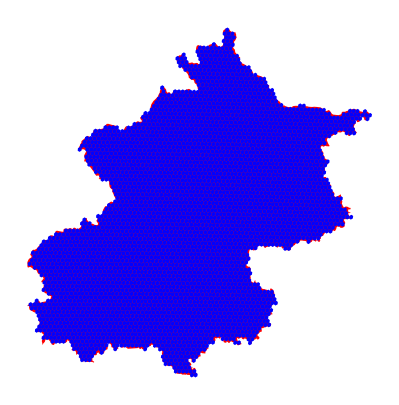

In [18]:
gdf2 = gpd.read_file('北京.json', encoding='utf-8')
ax = gdf2.plot(figsize=(5, 5), color='red')
gdf_h3 = gdf2.h3.polyfill_resample(7)
gdf_h3.plot(ax=ax, color='blue', figsize=(5, 5))
ax.axis("off")


In [19]:
temp_222 = gdf2.h3.polyfill(7)
# temp_222['h3_polyfill'].to_csv('temp_h4.csv', index=False)
temp2 = temp_222['h3_polyfill'][0]
file_name = "北京结果.csv"
pd.DataFrame(temp2).to_csv(file_name, index=False)


In [20]:
len(temp2)


4420

In [70]:
import h3
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import json

temp_h3 = gdf.h3.polyfill(7)['h3_polyfill'][0]



In [90]:
temp_h6 = set()
for i in temp_h3:
    temp_h6.add(h3.h3_to_parent(i))
temp_h5 = set()
for i in temp_h6:
    temp_h5.add(h3.h3_to_parent(i))
temp_h4 = set()
for i in temp_h5:
    temp_h4.add(h3.h3_to_parent(i))


In [113]:
exist_h4 = []
no_exist_h4 = []
for i in temp_h4:
    if i in temp_111:
        exist_h4.append(i)
    else:
        no_exist_h4.append(i)

no_exist_h4

['8431ae5ffffffff',
 '8431851ffffffff',
 '8431aa3ffffffff',
 '8431a85ffffffff',
 '8431a87ffffffff',
 '843181dffffffff',
 '8431859ffffffff',
 '8431aebffffffff',
 '8431ae1ffffffff',
 '8431abdffffffff']

In [114]:
temp_h4

{'8431819ffffffff',
 '843181bffffffff',
 '843181dffffffff',
 '8431851ffffffff',
 '8431853ffffffff',
 '8431857ffffffff',
 '8431859ffffffff',
 '843185bffffffff',
 '8431a85ffffffff',
 '8431a87ffffffff',
 '8431aa1ffffffff',
 '8431aa3ffffffff',
 '8431aa5ffffffff',
 '8431aa7ffffffff',
 '8431aa9ffffffff',
 '8431aabffffffff',
 '8431aadffffffff',
 '8431abdffffffff',
 '8431ae1ffffffff',
 '8431ae3ffffffff',
 '8431ae5ffffffff',
 '8431ae7ffffffff',
 '8431aebffffffff'}

In [93]:
hexagons = temp_h4
geojson_out = {
    "type": "FeatureCollection",
    "features": []
}

for i in hexagons:
    geojson_out["features"].append({
        "type": "Feature",
        "properties": {
            "identifier": i
        },
        "geometry": {
            "type": "Polygon",
            "coordinates": [
                h3.h3_to_geo_boundary(i, geo_json=True)
            ]
        }
    })

with open("temp.geojson", "w") as outfile:
    json.dump(geojson_out, outfile)


(115.18887553872581, 117.8036381653312, 39.09102302960888, 41.49753862759875)

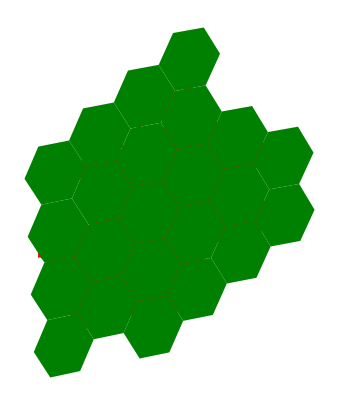

In [94]:
ax = gdf.plot(figsize=(5, 5), color='red')
tempRes = gpd.read_file('temp.geojson')
ax = tempRes.plot(ax = ax, color='green', figsize=(5, 5))
ax.axis('off')


(115.2513324152903, 117.61572369071193, 39.35644430425211, 41.140036628172346)

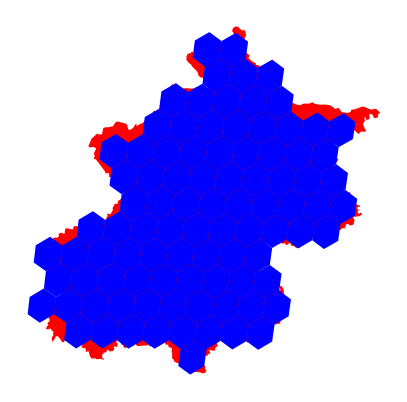

In [2]:
gdf = gpd.read_file('北京2.json')
ax = gdf.plot(figsize=(5, 5), color='red') 
gdf_h3 = gdf.h3.polyfill_resample(5)
gdf_h3.plot(ax=ax, color='blue', figsize=(5, 5))
ax.axis("off")


(115.31221280524093, 117.61371772035137, 39.36093240805567, 41.142285386884375)

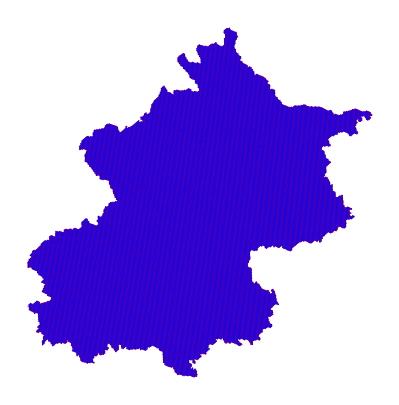

In [15]:
ax = gdf.plot(figsize=(5, 5), color='red')
gdf_h3 = gdf.h3.polyfill_resample(8)
gdf_h3.plot(ax=ax, color='blue', figsize=(5, 5))
ax.axis("off")



(115.28990235790614, 117.62256008201872, 39.338079179583396, 41.14510164039329)

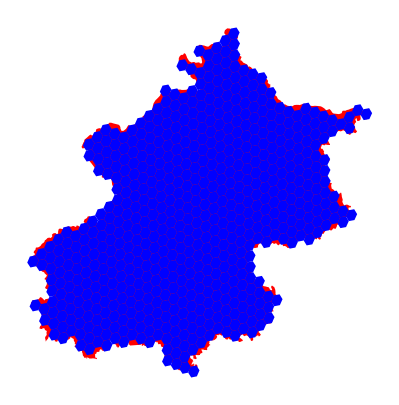

In [16]:
gdf = gpd.read_file('北京.json')
ax = gdf.plot(figsize=(5, 5), color='red')
gdf_h3 = gdf.h3.polyfill_resample(6)
gdf_h3.plot(ax=ax, color='blue', figsize=(5, 5))
ax.axis("off")


In [7]:
temp = gpd.read_file('output.geojson')
temp


,identifier,geometry
0,882830876dfffff,"POLYGON ((-122.43591 37.79458, -122.43143 37.7..."
1,88283082bdfffff,"POLYGON ((-122.41077 37.78529, -122.40630 37.7..."
2,882830959dfffff,"POLYGON ((-122.50731 37.75547, -122.50284 37.7..."
3,8828308233fffff,"POLYGON ((-122.37393 37.75608, -122.36945 37.7..."
4,88283095b9fffff,"POLYGON ((-122.49391 37.76611, -122.48944 37.7..."
...,...,...
175,8828309597fffff,"POLYGON ((-122.51166 37.76954, -122.50719 37.7..."
176,8828309437fffff,"POLYGON ((-122.50899 37.72493, -122.50452 37.7..."
177,88283082adfffff,"POLYGON ((-122.38563 37.77600, -122.38116 37.7..."
178,882830829bfffff,"POLYGON ((-122.45235 37.77571, -122.44788 37.7..."


(121.55288684872586,
 122.89528753061677,
 29.547323770263876,
 30.925654627730943)

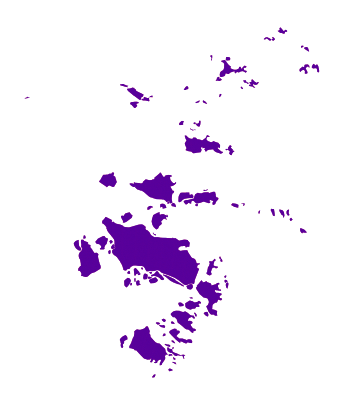

In [6]:

gdf = gpd.read_file('舟山市.json')
ax = gdf.plot(figsize=(5, 5), color='red')
gdf_h3 = gdf.h3.polyfill_resample(10)
gdf_h3.plot(ax=ax, color='blue', figsize=(5, 5))
ax.axis("off")
